<a href="https://colab.research.google.com/github/ErigiVaishnavi/Early-Warning-Prediction-of-Environmental-Parameters/blob/main/Environmental_conditions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBRegressor


Inserting Datasets which contains total 40 days data

In [ ]:
#importing datasets for CO2,co,no,temperatur,humidity
df1 = pd.read_csv("/content/Gas parameters.csv")
df_CO2 = pd.read_csv("/content/january_2024_co2_data (1).csv")
df_CO = pd.read_csv("/content/january_2024_co_data.csv")
df_NO = pd.read_csv("/content/january_2024_no_data.csv")
df_temp = pd.read_csv("/content/january_2024_Temp.csv")
df_humidity = pd.read_csv("/content/january_2024_Humi.csv")

# Data Integration, Formatting, Concatenation and Cleaning.


Combining new data into single datafram and insterting co,no,temp, humi colums from previous datasets

In [ ]:
#Combining the new data into single dataframe
df2 = df_CO2

In [ ]:
df2['CO'] = df_CO['CO']
df2['NO'] = df_NO['NO']
df2['temp'] = df_temp['Temp']
df2['humi'] = df_humidity['Humi']

In [ ]:
df2

,DateTime,CO2,CO,NO,temp,humi
0,12/31/2023 0:00,544,0,0,29.8,61.4
1,12/31/2023 0:05,546,0,0,29.8,61.4
2,12/31/2023 0:10,549,0,0,29.8,61.4
3,12/31/2023 0:15,546,0,0,29.6,61.4
4,12/31/2023 0:20,548,0,0,29.6,61.4
...,...,...,...,...,...,...
9211,1/31/2024 23:35,550,0,0,29.2,59.9
9212,1/31/2024 23:40,549,0,0,29.2,59.9
9213,1/31/2024 23:45,547,0,0,29.2,59.9
9214,1/31/2024 23:50,549,0,0,29.2,59.9


converting the datetime column in the old data to original datetime format in df1 and df2 data.

by creating new Datetime column and droping the existing datetime column




In [ ]:
#converting the datetime column in the old data to original datetime format using pandas function to_datetime
df1['Datetime'] = pd.to_datetime(df1['Date'] + ' ' + df1['Time'])
df1.drop(['Date', 'Time'], axis=1, inplace=True)
df1.insert(0, 'Datetime', df1.pop('Datetime'))
print(df1)

                Datetime  CO2  CO  NO  Temp  Humi
0    2023-12-23 23:56:00  563   0   0  29.8  59.8
1    2023-12-23 23:51:00  556   0   0  29.8  59.7
2    2023-12-23 23:56:00  553   0   0  29.8  59.7
3    2023-12-23 23:51:00  558   0   0  29.8  59.7
4    2023-12-23 23:45:00  561   0   0  29.9  59.7
...                  ...  ...  ..  ..   ...   ...
2187 2023-12-30 00:20:00  552   0   0  28.9  60.5
2188 2023-12-30 00:16:00  549   0   0  29.0  60.5
2189 2023-12-30 00:10:00  547   0   0  29.0  60.5
2190 2023-12-30 00:05:00  543   0   0  29.0  60.5
2191 2023-12-30 00:01:00  542   0   0  29.0  60.5

[2192 rows x 6 columns]


<ipython-input-7-eae857b95903>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['Datetime'] = pd.to_datetime(df1['Date'] + ' ' + df1['Time'])


In [ ]:
#converting the datetime column in the combined new data to original datetime format using pandas function to_datetime
#by creating new Datetime column and droping the existing datetime column
df2['Datetime'] = pd.to_datetime(df2['DateTime'])

In [ ]:
df2.drop(['DateTime'], axis=1, inplace=True)
df2.insert(0, 'Datetime', df2.pop('Datetime'))
print(df2)

                Datetime  CO2  CO  NO  temp  humi
0    2023-12-31 00:00:00  544   0   0  29.8  61.4
1    2023-12-31 00:05:00  546   0   0  29.8  61.4
2    2023-12-31 00:10:00  549   0   0  29.8  61.4
3    2023-12-31 00:15:00  546   0   0  29.6  61.4
4    2023-12-31 00:20:00  548   0   0  29.6  61.4
...                  ...  ...  ..  ..   ...   ...
9211 2024-01-31 23:35:00  550   0   0  29.2  59.9
9212 2024-01-31 23:40:00  549   0   0  29.2  59.9
9213 2024-01-31 23:45:00  547   0   0  29.2  59.9
9214 2024-01-31 23:50:00  549   0   0  29.2  59.9
9215 2024-01-31 23:55:00  556   0   0  29.2  59.9

[9216 rows x 6 columns]


In [ ]:
#renaming the certain columns in combined dataframe for combining with the old dataset
df2.rename(columns={'temp': 'Temp'}, inplace=True)
df2.rename(columns={'humi': 'Humi'}, inplace=True)

Concatenation of all colums from df1 and df2 in one dataframe


In [ ]:
# Concatenate the all columns along the columns axis (axis=1) vertically
df = pd.concat([df1, df2], axis=0)

# Display the concatenated DataFrame
print(df)


                Datetime  CO2  CO  NO  Temp  Humi
0    2023-12-23 23:56:00  563   0   0  29.8  59.8
1    2023-12-23 23:51:00  556   0   0  29.8  59.7
2    2023-12-23 23:56:00  553   0   0  29.8  59.7
3    2023-12-23 23:51:00  558   0   0  29.8  59.7
4    2023-12-23 23:45:00  561   0   0  29.9  59.7
...                  ...  ...  ..  ..   ...   ...
9211 2024-01-31 23:35:00  550   0   0  29.2  59.9
9212 2024-01-31 23:40:00  549   0   0  29.2  59.9
9213 2024-01-31 23:45:00  547   0   0  29.2  59.9
9214 2024-01-31 23:50:00  549   0   0  29.2  59.9
9215 2024-01-31 23:55:00  556   0   0  29.2  59.9

[11408 rows x 6 columns]


Sorting and removing Duplicated based on the datetime column

In [ ]:
# Sort the DataFrame based on the datetime column
df_sorted = df.sort_values(by='Datetime')

# Remove duplicates based on the datetime column
df = df_sorted.drop_duplicates(subset='Datetime')

# Display the DataFrame with sorted and duplicate-free datetime column
print(df)


                Datetime  CO2  CO  NO  Temp  Humi
273  2023-12-23 00:01:00  560   0   0  29.7  59.8
272  2023-12-23 00:05:00  561   0   0  29.7  59.8
271  2023-12-23 00:10:00  565   0   0  29.7  59.8
270  2023-12-23 00:16:00  567   0   0  29.7  59.8
269  2023-12-23 00:20:00  570   0   0  29.6  59.8
...                  ...  ...  ..  ..   ...   ...
9211 2024-01-31 23:35:00  550   0   0  29.2  59.9
9212 2024-01-31 23:40:00  549   0   0  29.2  59.9
9213 2024-01-31 23:45:00  547   0   0  29.2  59.9
9214 2024-01-31 23:50:00  549   0   0  29.2  59.9
9215 2024-01-31 23:55:00  556   0   0  29.2  59.9

[11376 rows x 6 columns]


In [ ]:
#formatting the index to datatime of our original dataframe
df.index = pd.to_datetime(df['Datetime'], format='%d.%m.%Y %H:%M:%S')

In [ ]:
df

,Datetime,CO2,CO,NO,Temp,Humi
Datetime,,,,,,
2023-12-23 00:01:00,2023-12-23 00:01:00,560,0,0,29.7,59.8
2023-12-23 00:05:00,2023-12-23 00:05:00,561,0,0,29.7,59.8
2023-12-23 00:10:00,2023-12-23 00:10:00,565,0,0,29.7,59.8
2023-12-23 00:16:00,2023-12-23 00:16:00,567,0,0,29.7,59.8
2023-12-23 00:20:00,2023-12-23 00:20:00,570,0,0,29.6,59.8
...,...,...,...,...,...,...
2024-01-31 23:35:00,2024-01-31 23:35:00,550,0,0,29.2,59.9
2024-01-31 23:40:00,2024-01-31 23:40:00,549,0,0,29.2,59.9
2024-01-31 23:45:00,2024-01-31 23:45:00,547,0,0,29.2,59.9


# Analysis of Environmental Conditions

Defining Environmental Condition Thresholds

In [ ]:
"""# Define environmental condition thresholds
conditions = {
    'Good': {'CO2': (400, 500)},
    'Satisfactory': {'CO2': (501, 550)},
    'Poor': {'CO2': (551, 600)},
    'Very poor': {'CO2': (601, 700)},
    'Severe': {'CO2': (701, float('inf'))}
}"""

In [ ]:
#Determine Thrisholed values
conditions = {
    'Good': {'CO2': (400, 500), 'CO': (0, 15), 'NO': (0, 10), 'Temp': (28, 30), 'Humi': (59.5, 62)},
    'Satisfactory': {'CO2': (501, 550), 'CO': (16, 18), 'NO': (11, 13), 'Temp': (31, 32), 'Humi': (58.5, 59.4)},
    'Poor': {'CO2': (551, 600), 'CO': (19, 20), 'NO': (14, 15), 'Temp': (32.1, 32.5), 'Humi': (57, 58.4)},
    'Very poor': {'CO2': (601, 700), 'CO': (20, 22), 'NO': (16, 18), 'Temp': (32.6, 32.9), 'Humi': (56, 56.9)},
    'Severe': {'CO2': (701, float('inf')), 'CO': (22.1, float('inf')), 'NO': (18.1, float('inf')), 'Temp': (33, float('inf')), 'Humi': (55, float('inf'))}
}

Function to Determine Environmental Condition

In [ ]:
"""# Function to determine environmental condition
def get_env_condition(row):
  if 400 <= row['CO2'] <= 500  :
    return 'Good'
  elif 501 <= row['CO2'] <= 600:
    return 'Satisfactory'
  elif 601 <= row['CO2'] <= 650:
    return 'Poor'
  elif 651 <= row['CO2'] <= 710 :
    return 'Very poor'
  else:
    return 'Severe'"""

In [ ]:
def get_env_condition(row):
    if 400 <= row['CO2'] <= 500 and 0 <= row['CO'] <= 15 and 0 <= row['NO'] <= 10:
        return 'Good'
    elif 501 <= row['CO2'] <= 550 and 0 <= row['CO'] <= 18 and 0 <= row['NO'] <= 13:
        return 'Satisfactory'
    elif 551 <= row['CO2'] <= 600 and 0 <= row['CO'] <= 20 and 0 <= row['NO'] <= 15:
        return 'Poor'
    elif 601 <= row['CO2'] <= 700 and 0 <= row['CO'] <= 22 and 0 <= row['NO'] <= 18:
        return 'Very poor'
    else:
        return 'Severe'

Creating 'Env_Condition' Column

In [ ]:
# Create 'Env_Condition' column
df['Env_Condition'] = df.apply(get_env_condition, axis=1)

In [ ]:
# Convert DataFrame to list of dictionaries
data_list = df.to_dict('records')

# Print each row individually
for row in data_list:
    print(row)

Streaming output truncated to the last 5000 lines.
{'Datetime': Timestamp('2024-01-14 15:20:00'), 'CO2': 542, 'CO': 0, 'NO': 0, 'Temp': 30.1, 'Humi': 57.1, 'Env_Condition': 'Satisfactory'}
{'Datetime': Timestamp('2024-01-14 15:25:00'), 'CO2': 549, 'CO': 0, 'NO': 0, 'Temp': 30.1, 'Humi': 57.5, 'Env_Condition': 'Satisfactory'}
{'Datetime': Timestamp('2024-01-14 15:30:00'), 'CO2': 551, 'CO': 0, 'NO': 0, 'Temp': 30.1, 'Humi': 57.3, 'Env_Condition': 'Poor'}
{'Datetime': Timestamp('2024-01-14 15:35:00'), 'CO2': 556, 'CO': 0, 'NO': 0, 'Temp': 30.0, 'Humi': 57.4, 'Env_Condition': 'Poor'}
{'Datetime': Timestamp('2024-01-14 15:40:00'), 'CO2': 552, 'CO': 0, 'NO': 0, 'Temp': 30.1, 'Humi': 57.3, 'Env_Condition': 'Poor'}
{'Datetime': Timestamp('2024-01-14 15:45:00'), 'CO2': 551, 'CO': 0, 'NO': 0, 'Temp': 30.1, 'Humi': 57.2, 'Env_Condition': 'Poor'}
{'Datetime': Timestamp('2024-01-14 15:50:00'), 'CO2': 556, 'CO': 0, 'NO': 0, 'Temp': 30.1, 'Humi': 57.1, 'Env_Condition': 'Poor'}
{'Datetime': Timestamp(

Plotting distribution of environmental conditions

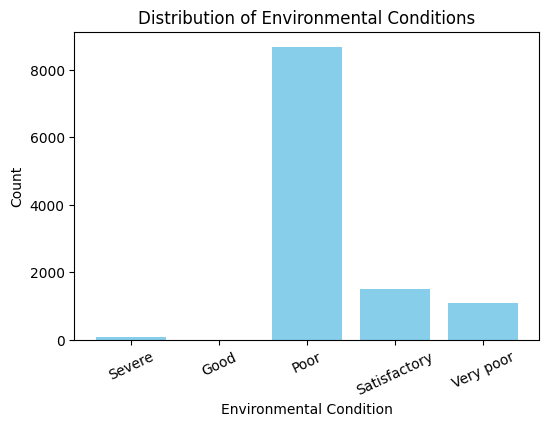

In [ ]:
# Define the environmental conditions
conditions = ['Severe', 'Good', 'Poor', 'Satisfactory', 'Very poor']

# Initialize a dictionary to store the count of each condition
condition_counts = {condition: 0 for condition in conditions}

# Count the occurrences of each environmental condition
for condition in conditions:
    condition_counts[condition] = (df['Env_Condition'] == condition).sum()

# Plotting the distribution
plt.figure(figsize=(6, 4))
plt.bar(condition_counts.keys(), condition_counts.values(), color='skyblue')
plt.title('Distribution of Environmental Conditions')
plt.xlabel('Environmental Condition')
plt.ylabel('Count')
plt.xticks(rotation=25)
plt.show()

In [ ]:
from google.colab import files
# Save the DataFrame to a CSV file
df.to_csv('dataset_with_env_condition.csv', index=False)

files.download('dataset_with_env_condition.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Correlation Analysis

In [ ]:
# Calculate the correlation matrix
new_df = df.iloc[:, :6]
correlation_matrix = new_df.corr()

# Extract correlations with CO2, CO, NO
air_pollutants_correlation = correlation_matrix[['CO2', 'CO', 'NO']]
print("Correlation with Air Pollutants (CO2, CO, NO):\n", air_pollutants_correlation)

# Extract correlations with temperature and humidity
meteorological_correlation = correlation_matrix[['Temp', 'Humi']]
print("\nCorrelation with Meteorological Factors (Temp, Humi):\n", meteorological_correlation)


Correlation with Air Pollutants (CO2, CO, NO):
                CO2        CO        NO
Datetime  0.023315 -0.028070 -0.052251
CO2       1.000000  0.499867  0.555065
CO        0.499867  1.000000  0.865780
NO        0.555065  0.865780  1.000000
Temp      0.279925  0.076182  0.129527
Humi     -0.284458 -0.026990 -0.084371

Correlation with Meteorological Factors (Temp, Humi):
               Temp      Humi
Datetime -0.005894 -0.015098
CO2       0.279925 -0.284458
CO        0.076182 -0.026990
NO        0.129527 -0.084371
Temp      1.000000 -0.682417
Humi     -0.682417  1.000000


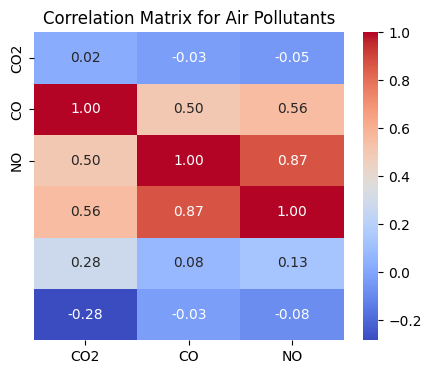

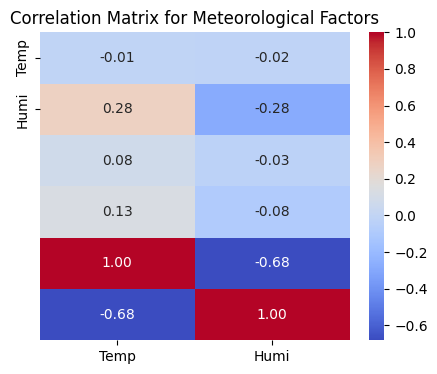

In [ ]:
import seaborn as sns
# Plot correlation matrix for air pollutants
plt.figure(figsize=(5, 4))
sns.heatmap(air_pollutants_correlation, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=air_pollutants_correlation.columns, yticklabels=air_pollutants_correlation.columns)
plt.title('Correlation Matrix for Air Pollutants')
plt.show()

#Plot correlation matrix for meteorological factors
plt.figure(figsize=(5, 4))
sns.heatmap(meteorological_correlation, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=meteorological_correlation.columns, yticklabels=meteorological_correlation.columns)
plt.title('Correlation Matrix for Meteorological Factors')
plt.show()


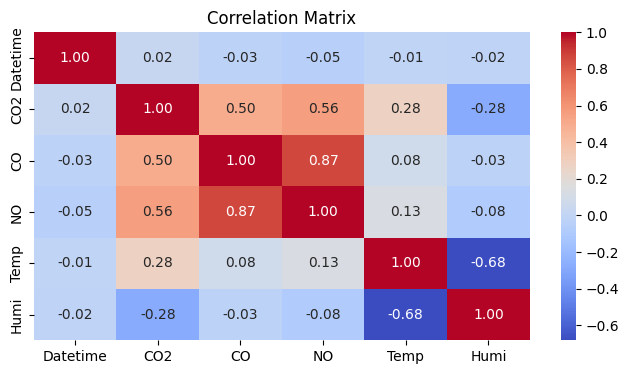

In [ ]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#  Feature Extraction

In [ ]:
# Convert categorical Environmental Condition into numerical labels
label_map = {'Good': 0, 'Satisfactory': 1, 'Poor': 2, 'Very poor': 3, 'Severe': 4}
df['Env_Condition'] = df['Env_Condition'].map(label_map)


In [ ]:
df

,Datetime,CO2,CO,NO,Temp,Humi,Env_Condition
Datetime,,,,,,,
2023-12-23 00:01:00,2023-12-23 00:01:00,560,0,0,29.7,59.8,2
2023-12-23 00:05:00,2023-12-23 00:05:00,561,0,0,29.7,59.8,2
2023-12-23 00:10:00,2023-12-23 00:10:00,565,0,0,29.7,59.8,2
2023-12-23 00:16:00,2023-12-23 00:16:00,567,0,0,29.7,59.8,2
2023-12-23 00:20:00,2023-12-23 00:20:00,570,0,0,29.6,59.8,2
...,...,...,...,...,...,...,...
2024-01-31 23:35:00,2024-01-31 23:35:00,550,0,0,29.2,59.9,1
2024-01-31 23:40:00,2024-01-31 23:40:00,549,0,0,29.2,59.9,1
2024-01-31 23:45:00,2024-01-31 23:45:00,547,0,0,29.2,59.9,1


In [ ]:
# Convert DateTime column to datetime type
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Extract year, month, day, hour, minute features from DateTime
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
df['Minute'] = df['Datetime'].dt.minute

# Drop the original DateTime column
df.drop(columns=['Datetime'], inplace=True)



In [ ]:
df

,CO2,CO,NO,Temp,Humi,Env_Condition,Year,Month,Day,Hour,Minute
Datetime,,,,,,,,,,,
2023-12-23 00:01:00,560,0,0,29.7,59.8,2,2023,12,23,0,1
2023-12-23 00:05:00,561,0,0,29.7,59.8,2,2023,12,23,0,5
2023-12-23 00:10:00,565,0,0,29.7,59.8,2,2023,12,23,0,10
2023-12-23 00:16:00,567,0,0,29.7,59.8,2,2023,12,23,0,16
2023-12-23 00:20:00,570,0,0,29.6,59.8,2,2023,12,23,0,20
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-31 23:35:00,550,0,0,29.2,59.9,1,2024,1,31,23,35
2024-01-31 23:40:00,549,0,0,29.2,59.9,1,2024,1,31,23,40
2024-01-31 23:45:00,547,0,0,29.2,59.9,1,2024,1,31,23,45


# Model Building and Evaluation


In [ ]:
# Separate features and target variable
X = df[['Year', 'Month', 'Day', 'Hour', 'Minute']]
y = df['Env_Condition']


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Build and train the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb_model.predict(X_test)


In [ ]:
# Convert predictions to binary classification
y_pred_binary = [round(pred) for pred in y_pred]

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')


Mean Squared Error: 0.11075101785136761
Accuracy: 0.8554481546572935
